<a href="https://colab.research.google.com/github/azizamirsaidova/datadive/blob/main/K_Console.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook analyzes the *K Console Social Volume* and *Activations* data conducting following techniques:

For **K Console Social Volume**:
* Chooses only United States data
* Plots the K Console Social Volume in United States from Nov 20, 2017 until Dec 30, 2019
* Randomly Replaces values with null 

For **K Console Activations**:
* Chooses only United States data
* Plots the K Console Activations in United States from 2013 until 2020 applying OLS to capture the trend with Scatter Plot
* Plots the K Console Activations in United States from 2013 until 2020 with Linear Plot
* Randomly Replaces values with null 

# **Analyzing K Console Social Volume**

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("k console social - volume.csv")

In [3]:
df.describe()

,Volume
count,22449.000000
mean,2043.943472
std,18343.578379
min,1.000000
25%,7.000000
50%,30.000000
75%,182.000000
max,538307.000000


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Countries'].value_counts().to_frame()

,Countries
Not available,257
Hong Kong,115
Trinidad and Tobago,115
Hungary,115
Czech Republic,115
...,...
Guinea-Bissau,21
New Caledonia,21
"Saint Helena, Ascension and Tristan da Cunha",20
Pitcairn,10


In [6]:
usa = df[df['Countries'].isin(['United States'])]
usa

,Subtopics,Date,Countries,Volume
1,K Console,2017-11-20,United States,94200
205,K Console,2017-11-27,United States,150579
410,K Console,2017-12-04,United States,156013
620,K Console,2017-12-11,United States,138090
824,K Console,2017-12-18,United States,116942
...,...,...,...,...
21479,K Console,2019-12-02,United States,83721
21678,K Console,2019-12-09,United States,90031
21880,K Console,2019-12-16,United States,76283
22078,K Console,2019-12-23,United States,60276


In [8]:
import plotly.express as px
fig = px.line(usa, x="Date", y="Volume", color='Countries')
fig.update_layout(title = "K Console Social Volume in United States from Nov 20, 2017 until Dec 30, 2019",
     xaxis_title = 'Date', yaxis_title = 'Volume')
fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))
fig.show()

# **Replace randomly some of the values with null in usa dataframe**

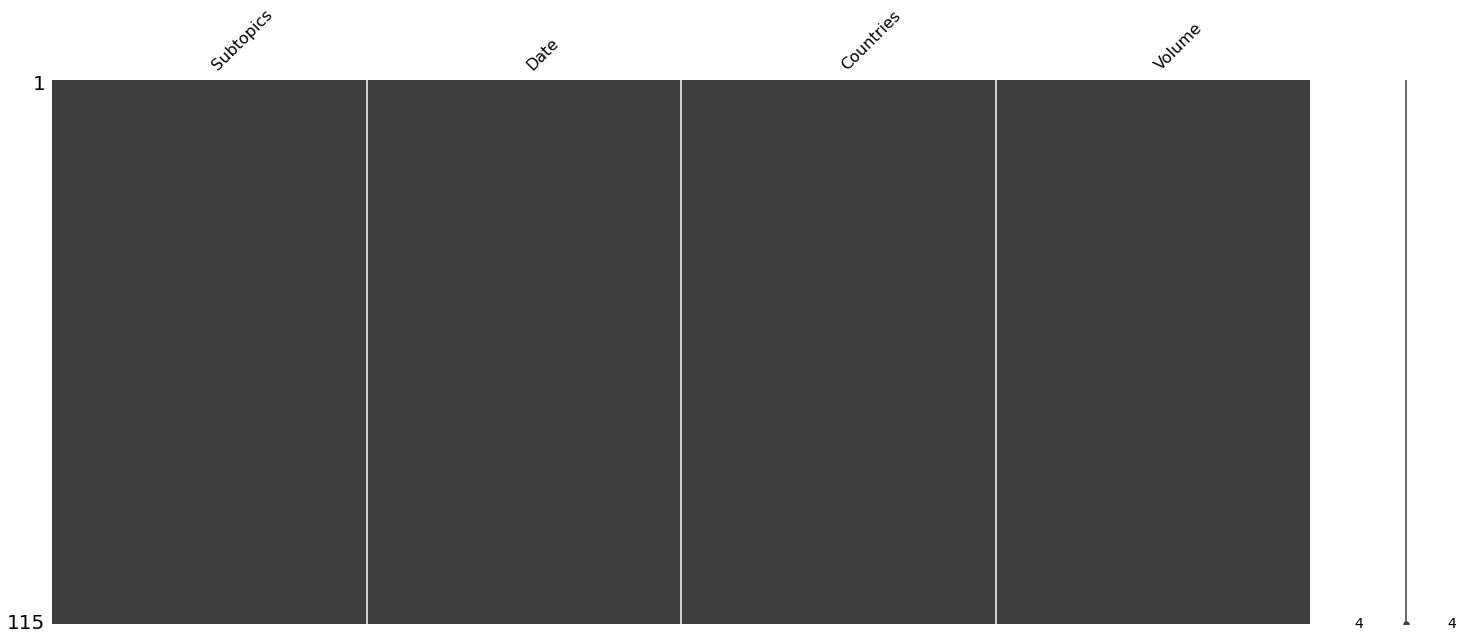

In [9]:
#Before applying null to some of the values
import missingno as msno
msno.matrix(usa)

In [10]:
usa2 = usa.copy()

In [11]:
#Replace fraction of values with null
#0.96 means only 4% of the data will be replaced with null
usa2['Volume'] = usa2['Volume'].sample(frac = 0.96)
usa2['Subtopics'] = usa2['Subtopics'].sample(frac = 0.88)
usa2["Date"] = usa2["Date"].sample(frac = 0.99)

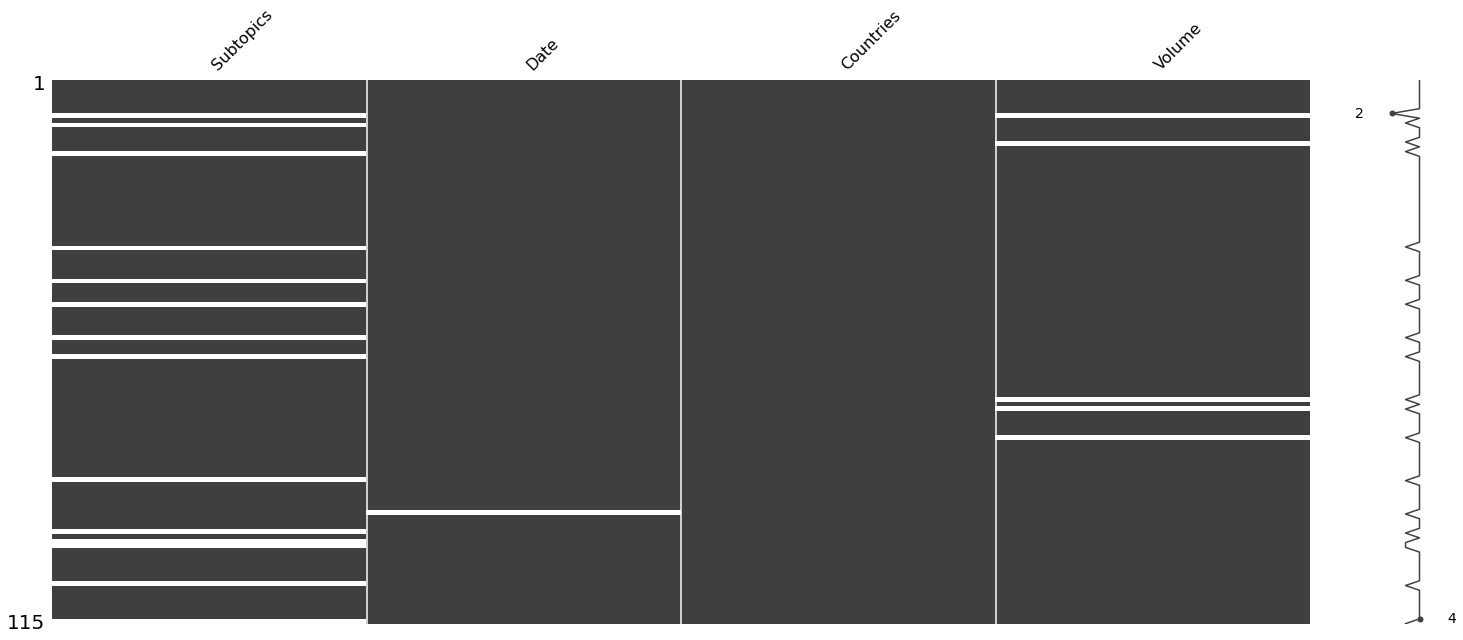

In [12]:
#After applying null to some of the values
import missingno as msno
msno.matrix(usa2)

# **Analyzing K Console Activations**

In [13]:
act = pd.read_csv("k console activations.csv")
act

,COUNTRY_ISO_CODE,Country,Week id,Week end date,Total Activations
0,AR,Argentina,201346,11/17/2013,14
1,AR,Argentina,201347,11/24/2013,68
2,AR,Argentina,201348,12/1/2013,"1,348"
3,AR,Argentina,201349,12/8/2013,841
4,AR,Argentina,201350,12/15/2013,445
...,...,...,...,...,...
22560,UY,Uruguay,202013,3/29/2020,599
22561,UY,Uruguay,202014,4/5/2020,620
22562,UY,Uruguay,202015,4/12/2020,571
22563,UY,Uruguay,202016,4/19/2020,475


In [14]:
act['Week end date'] = pd.to_datetime(act['Week end date'])

In [15]:
act_usa = act[act['Country'].isin(['United States'])]
act_usa

,COUNTRY_ISO_CODE,Country,Week id,Week end date,Total Activations
22004,US,United States,201346,2013-11-17,"579,143"
22005,US,United States,201347,2013-11-24,"137,023"
22006,US,United States,201348,2013-12-01,"118,285"
22007,US,United States,201349,2013-12-08,"73,261"
22008,US,United States,201350,2013-12-15,"96,510"
...,...,...,...,...,...
22336,US,United States,202013,2020-03-29,"131,458"
22337,US,United States,202014,2020-04-05,"126,406"
22338,US,United States,202015,2020-04-12,"126,846"
22339,US,United States,202016,2020-04-19,"174,002"


In [16]:
act_usa['Total Activations'] = act_usa['Total Activations'].str.replace(',', '').astype("float64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
import plotly.express as px
fig = px.scatter(act_usa, x="Week end date", y="Total Activations", trendline="ols")
fig.show()  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [18]:
fig = px.line(act_usa, x="Week end date", y="Total Activations", color='Country')
fig.show()

In [19]:
print("Average activations conducted in the USA is ", act_usa['Total Activations'].mean())

Average activations conducted in the USA is  100248.6824925816


# **Replace randomly some of the values with null in act_usa dataframe**

In [20]:
act_usa2 = act_usa.copy()

In [21]:
act_usa2['Total Activations'] = act_usa2['Total Activations'].sample(frac = 0.96)
act_usa2['COUNTRY_ISO_CODE'] = act_usa2['COUNTRY_ISO_CODE'].sample(frac = 0.78)
act_usa2['Week id'] = act_usa2['COUNTRY_ISO_CODE'].sample(frac = 0.88)
act_usa2["Week end date"] = act_usa2["Week end date"].sample(frac = 0.99)

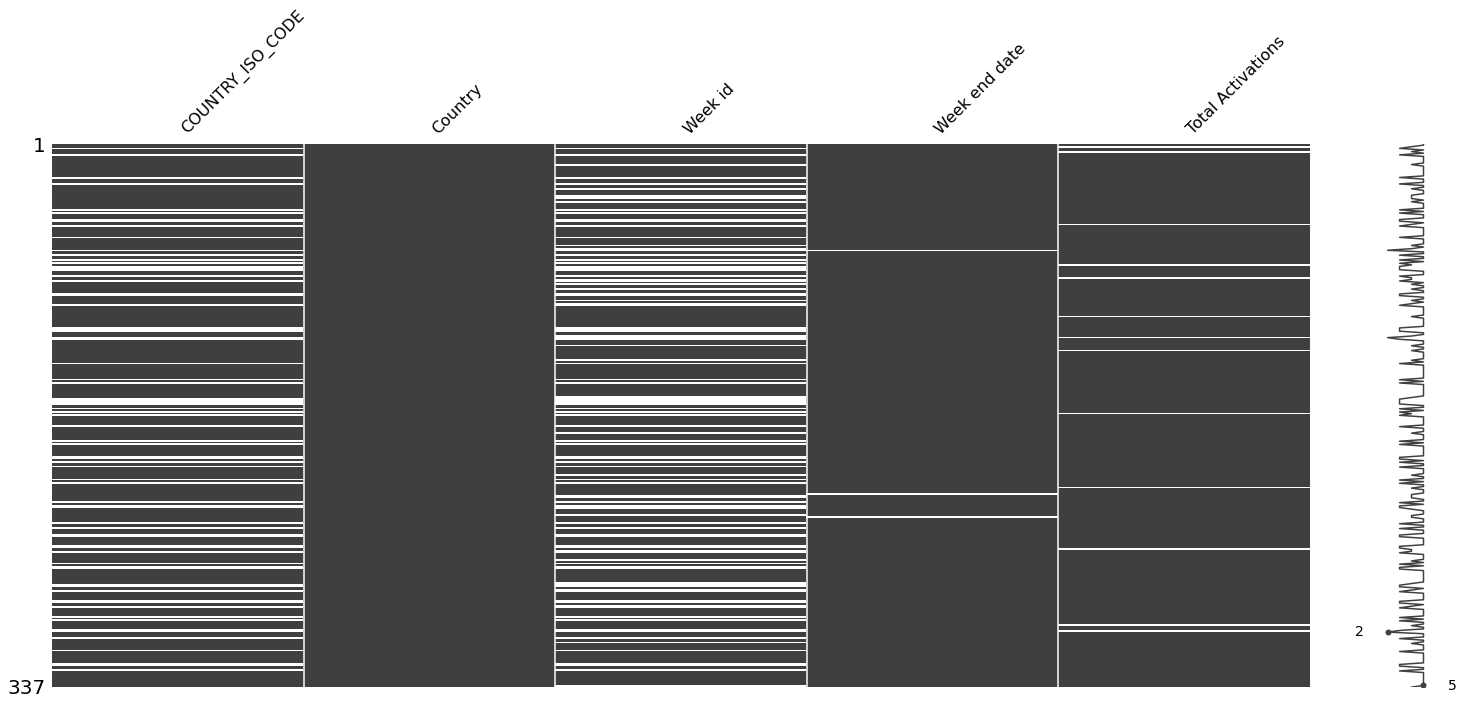

In [22]:
import missingno as msno
msno.matrix(act_usa2)

# **Social Volume vs Activation**

In [23]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=act_usa['Week end date'],
    y=act_usa['Total Activations'],
    hovertext=act_usa['Total Activations'],
    hoverinfo="text",
    marker=dict(
        color="blue"
    ),
    showlegend=True,
    name = 'Activations'
))


fig.add_trace(go.Scatter(
    x=usa['Date'],
    y=usa['Volume'],
    hovertext=usa['Volume'],
    hoverinfo="text",
    marker=dict(
        color="green"
    ),
    showlegend=True, 
    name="Social Volume"  
))

fig.update_layout(
    title="Social Volume VS Activations in the United States",
    xaxis_title="Date",
    yaxis_title="Volume and Activations",
    # legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Rebecca Purple"))

fig.show()